In [1]:
from plot_params import *
import pandas as pd
df=pd.read_csv(outdir / 'Human_annotated.csv.gz')

In [2]:
df.head()

,Unnamed: 0,transcript_id,deletion_index_start,deletion_index_end,difference,synapse_probability,start_annotation,end_annotation,subseq
0,0,ENST00000005082,0,60,0.000854,0.014709,UTR5,UTR5,GCTAGCCGTAGGTCGTGTGACCCGCAGGCACCGGGAGATCCAGAAG...
1,1,ENST00000005082,30,90,0.000854,0.014709,UTR5,CDS,CCGGGAGATCCAGAAGTGAAACGCCAGGCTCTCTGGAGGCCAGGAG...
2,2,ENST00000005082,60,120,0.000854,0.014709,UTR5,CDS,CTCTGGAGGCCAGGAGATGACTCTGTTGACGTTCAGGGATGTGGCC...
3,3,ENST00000005082,90,150,0.001099,0.014954,CDS,CDS,GTTCAGGGATGTGGCCATAGAATTCTCCCTGGAGGAGTGGAAATGC...
4,4,ENST00000005082,120,180,0.001099,0.014954,CDS,CDS,GGAGGAGTGGAAATGCCTGGACCTCGCTCAGCAGAATTTGTACAGG...


<AxesSubplot:xlabel='start_annotation', ylabel='difference'>

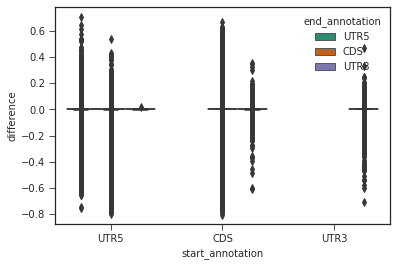

In [3]:
sns.boxplot(df, x = 'start_annotation', y = 'difference', hue = 'end_annotation')

In [4]:
df['gc_content']=df['subseq'].apply(lambda s: (s.count('C')+s.count('G'))/len(s))

<AxesSubplot:>

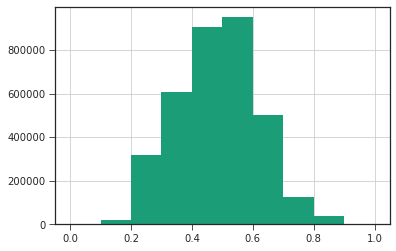

In [5]:
df['gc_content'].hist()

<AxesSubplot:xlabel='gc_content', ylabel='difference'>

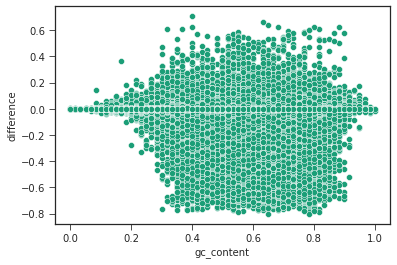

In [6]:
sns.scatterplot(df, x = 'gc_content', y = 'difference')

In [ ]:
df['annotation']=df.apply(
    lambda row: 'UTR5' if row['start_annotation']=='UTR5' and row['end_annotation']=='UTR5' else
     'UTR3' if row['start_annotation']=='UTR3' and row['end_annotation']=='UTR3' else 'CDS', axis = 1)

In [ ]:
df['annotation'].value_counts()

In [ ]:
sns.boxplot(df, x = 'annotation', y = 'difference')

In [ ]:
sns.relplot(df, x = 'gc_content', y = 'difference', col = 'annotation')